In [1]:
import pandas as pd
import numpy as np
titanic = pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

In [2]:
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 71.8+ KB


In [4]:
X = titanic[["pclass", "age", "sex"]]
y = titanic["survived"]

X.loc[:, "age"] = pd.to_numeric(X.ix[:, "age"], "coerce")
X.loc[:, "age"].fillna(X.loc[:, "age"].mean(), inplace=True)
X

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,pclass,age,sex
0,1st,29.000000,female
1,1st,2.000000,female
2,1st,30.000000,male
3,1st,25.000000,female
4,1st,0.916700,male
5,1st,47.000000,male
6,1st,63.000000,female
7,1st,39.000000,male
8,1st,58.000000,female
9,1st,71.000000,male


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
X = dv.fit_transform(X.to_dict("record"))

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=2)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
dv.feature_names_

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [27]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=6)

In [28]:
dtc.fit(Xtrain, ytrain)
ypre = dtc.predict(Xtest)
print(dtc.score(Xtest, ytest))

0.826747720365


In [29]:
dtc.decision_path(Xtest).toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int32)

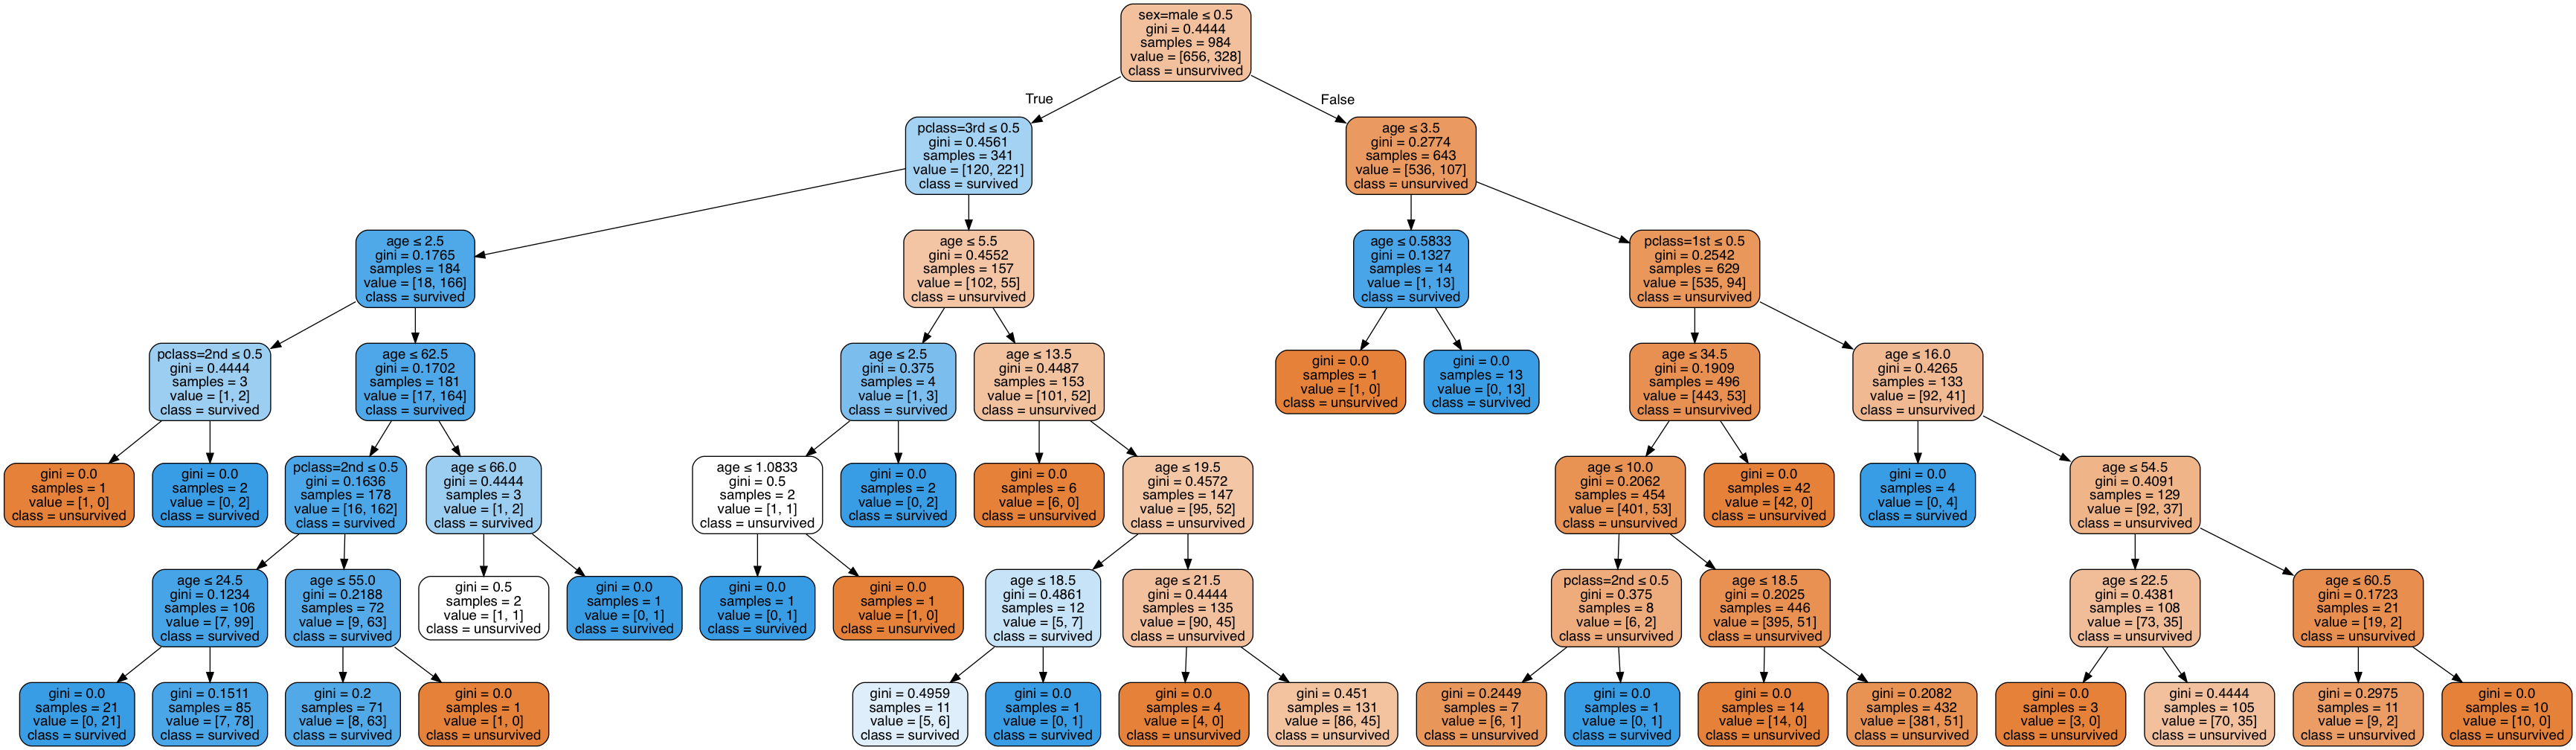

In [30]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=dv.feature_names_, class_names=["unsurvived", "survived"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())